# Visualize results

In [5]:
import random
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [6]:
inpath = ""
bootpath = ""
outpath = outpath= ""

In [19]:
results = pd.read_csv(inpath+'merged.csv')
results

,GDP per capita,year,tight,loose,indi,coll,old_care_vir,young_care_vir,old_fare_vir,young_fare_vir,...,old_negative,young_negative,old_warm,young_warm,old_unwarm,young_unwarm,old_competent,young_competent,old_incompetent,young_incompetent
0,799.000,1950,0.002368,0.001413,0.000211,0.000969,0.077528,0.167004,-0.223622,-0.048336,...,0.215519,0.102221,0.262306,0.395518,0.302466,0.244949,0.163599,0.353609,0.529452,0.366059
1,950.000,1951,0.002378,0.001369,0.000195,0.000848,0.065941,0.233189,-0.251721,-0.040441,...,0.167128,0.168900,0.227109,0.415024,0.323790,0.313511,0.115175,0.312196,0.480537,0.372717
2,1047.000,1952,0.002267,0.001430,0.000191,0.000852,0.145695,0.246119,-0.192902,-0.086577,...,0.162285,0.070029,0.298470,0.424860,0.198229,0.103335,0.149534,0.325749,0.437135,0.267225
3,1157.000,1953,0.002150,0.001471,0.000205,0.000830,0.063709,0.236412,-0.230772,-0.046209,...,0.166587,0.093523,0.265670,0.441650,0.299266,0.192502,0.152288,0.379986,0.629433,0.433454
4,1049.000,1954,0.001993,0.001611,0.000205,0.000825,0.059473,0.240752,-0.246282,-0.118399,...,0.260382,0.175968,0.239109,0.427290,0.380084,0.211279,0.114103,0.409148,0.554091,0.359907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,12733.932,2017,0.001599,0.002189,0.001363,0.000678,0.253297,0.333725,-0.243074,-0.057698,...,0.420587,0.303069,0.404546,0.484983,0.625151,0.430354,-0.064763,0.241197,0.551082,0.287992
68,13101.706,2018,0.001547,0.002217,0.001330,0.000702,0.218142,0.331101,-0.231970,-0.038894,...,0.435771,0.285361,0.420808,0.503786,0.594198,0.382162,-0.046556,0.265051,0.522542,0.205119
69,NaN,2019,NaN,NaN,NaN,NaN,0.214937,0.297406,-0.190251,-0.017391,...,0.400159,0.240448,0.305951,0.452567,0.572570,0.313297,-0.165122,0.185019,0.476525,0.148190
70,NaN,2020,NaN,NaN,NaN,NaN,0.223103,0.304240,-0.201197,-0.097526,...,0.468865,0.323435,0.360825,0.496181,0.585490,0.325062,-0.066345,0.228097,0.476105,0.163762


In [7]:
# Use glob to find all files in the directory with the prefix "null_"
file_list = glob.glob(bootpath + "null_*.csv")

# Loop through the list of files and read them into a pandas DataFrame
df_list = []
for file in file_list:
    filename = os.path.basename(file)
    df = pd.read_csv(file)
    df['filename'] = filename
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
boot_df = pd.concat(df_list, ignore_index=True)

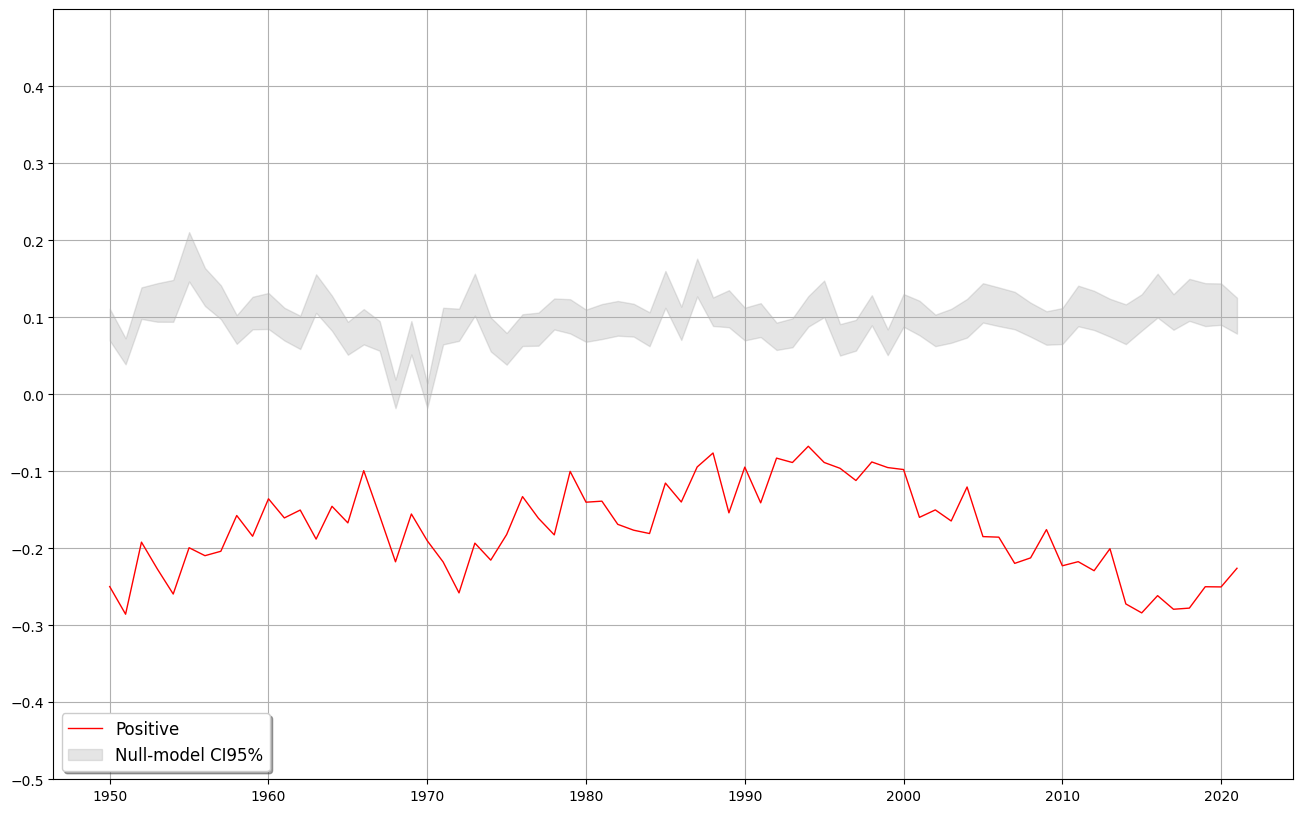

In [27]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_pos.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_positive'] - data1['young_positive'], color='red', lw=1, linestyle = 'solid', label='Positive')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'positive.png')

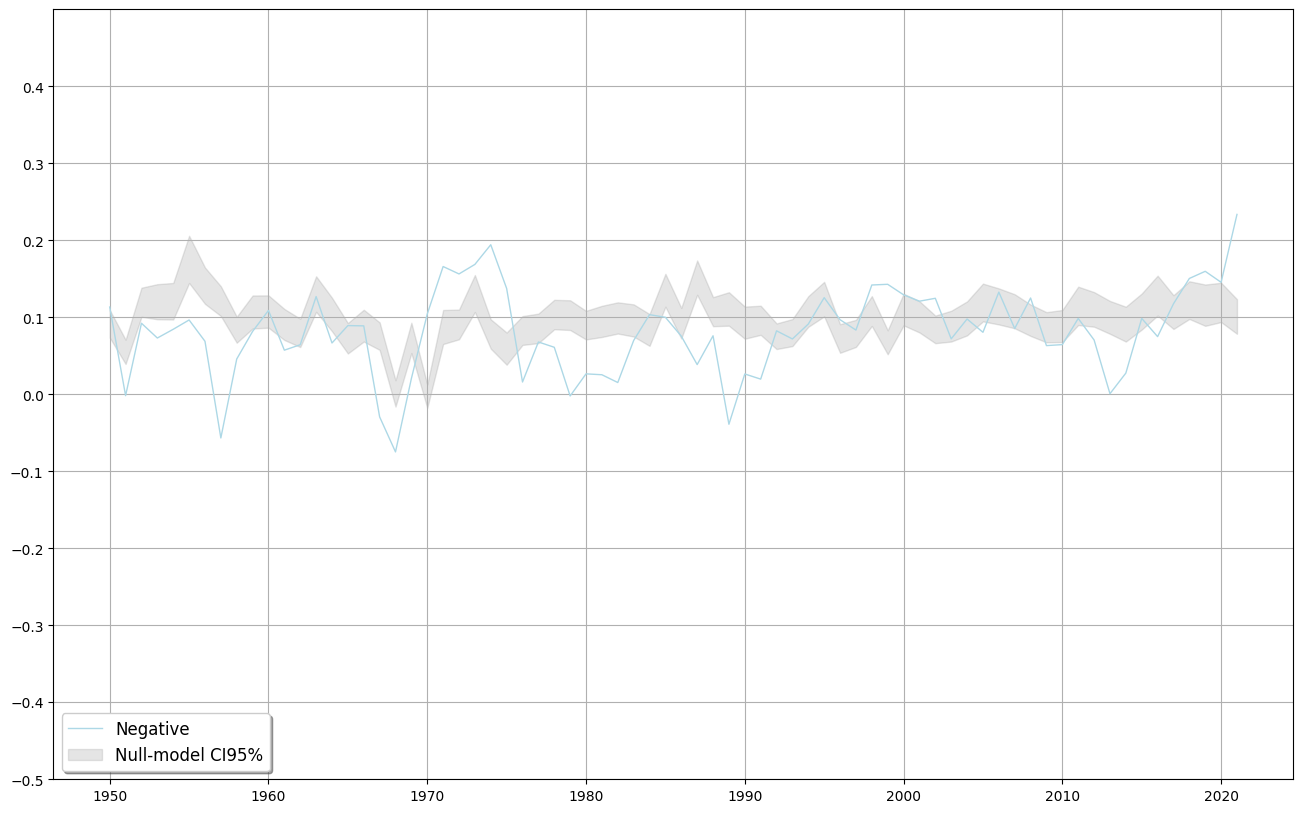

In [28]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_neg.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_negative'] - data1['young_negative'], color='lightblue', lw=1, linestyle = 'solid', label='Negative')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'negative.png')

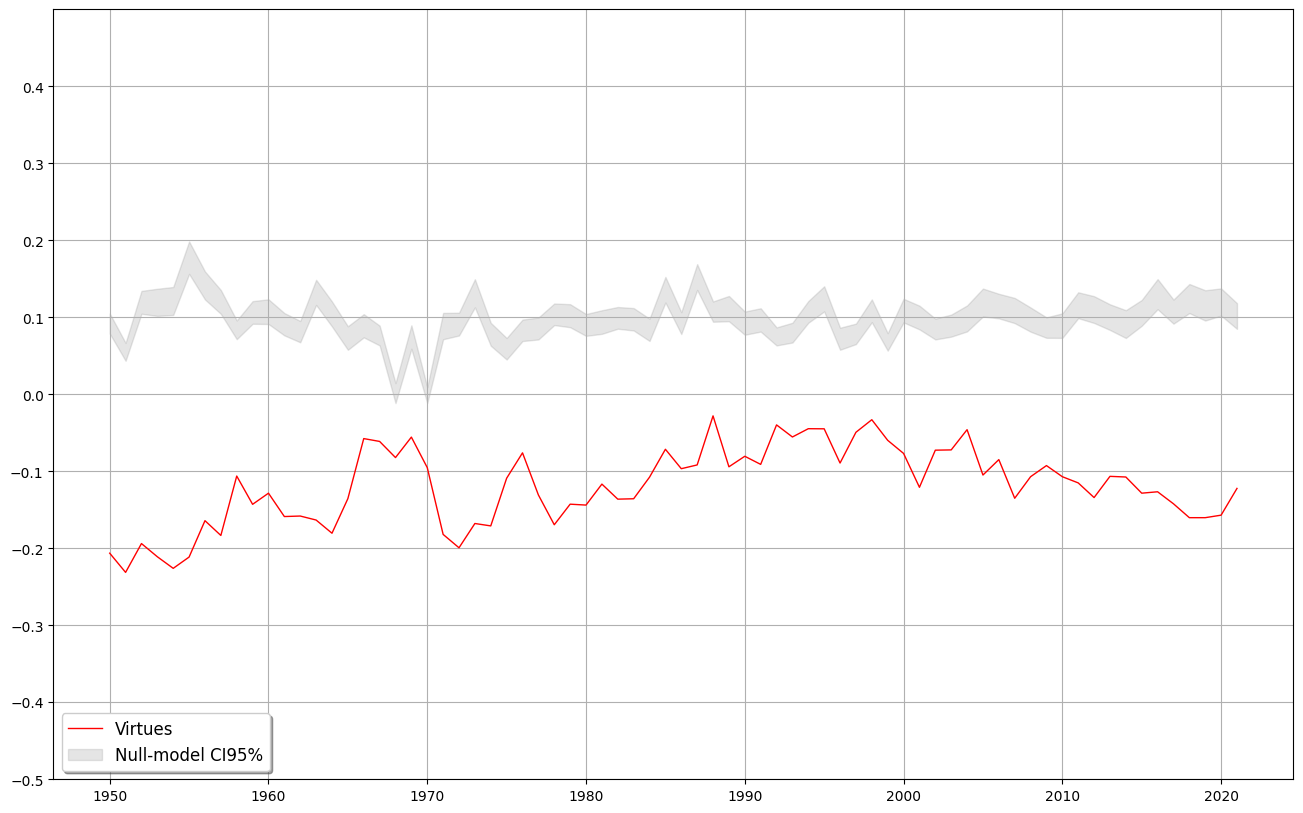

In [31]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_vir.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_virtue'] - data1['young_virtue'], color='red', lw=1, linestyle = 'solid', label='Virtues')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'virtues.png')

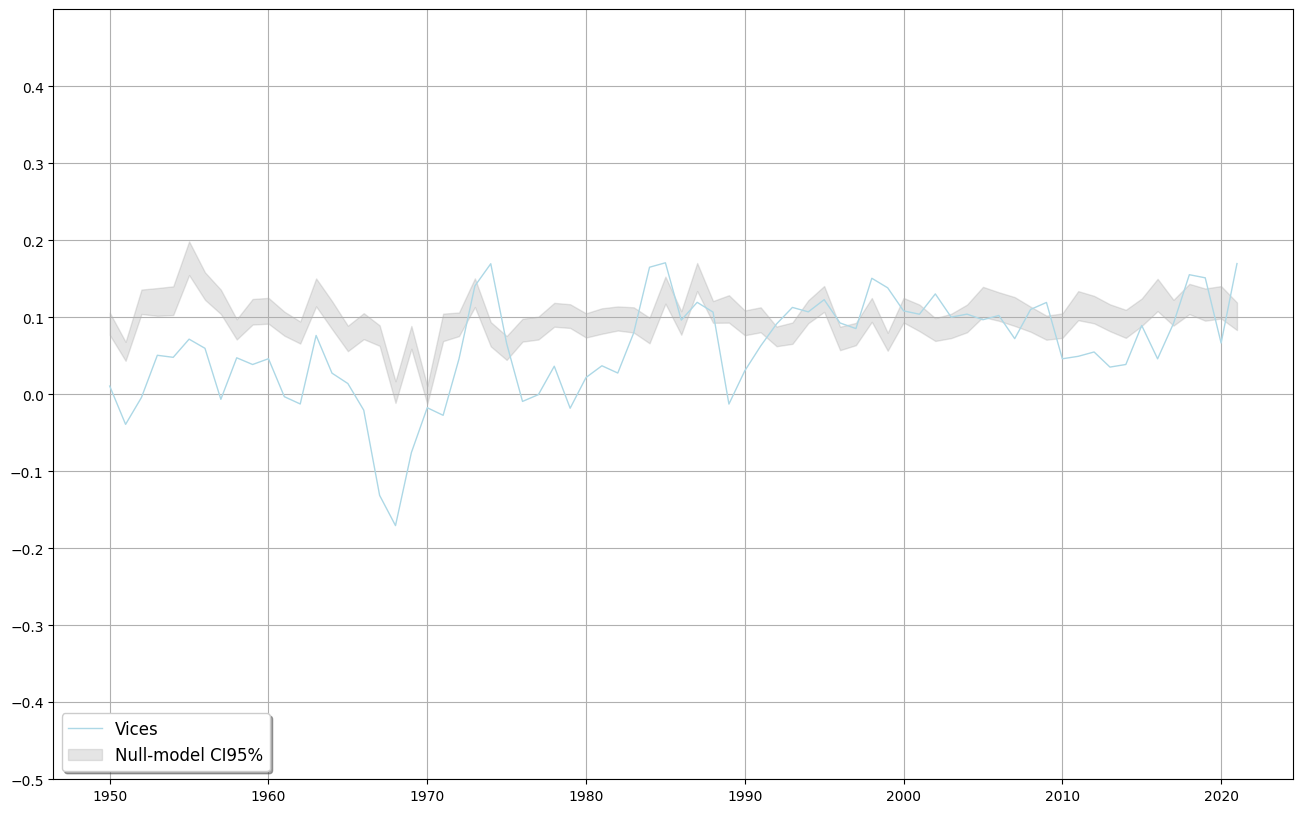

In [34]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_vic.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_vice'] - data1['young_vice'], color='lightblue', lw=1, linestyle = 'solid', label='Vices')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'vices.png')

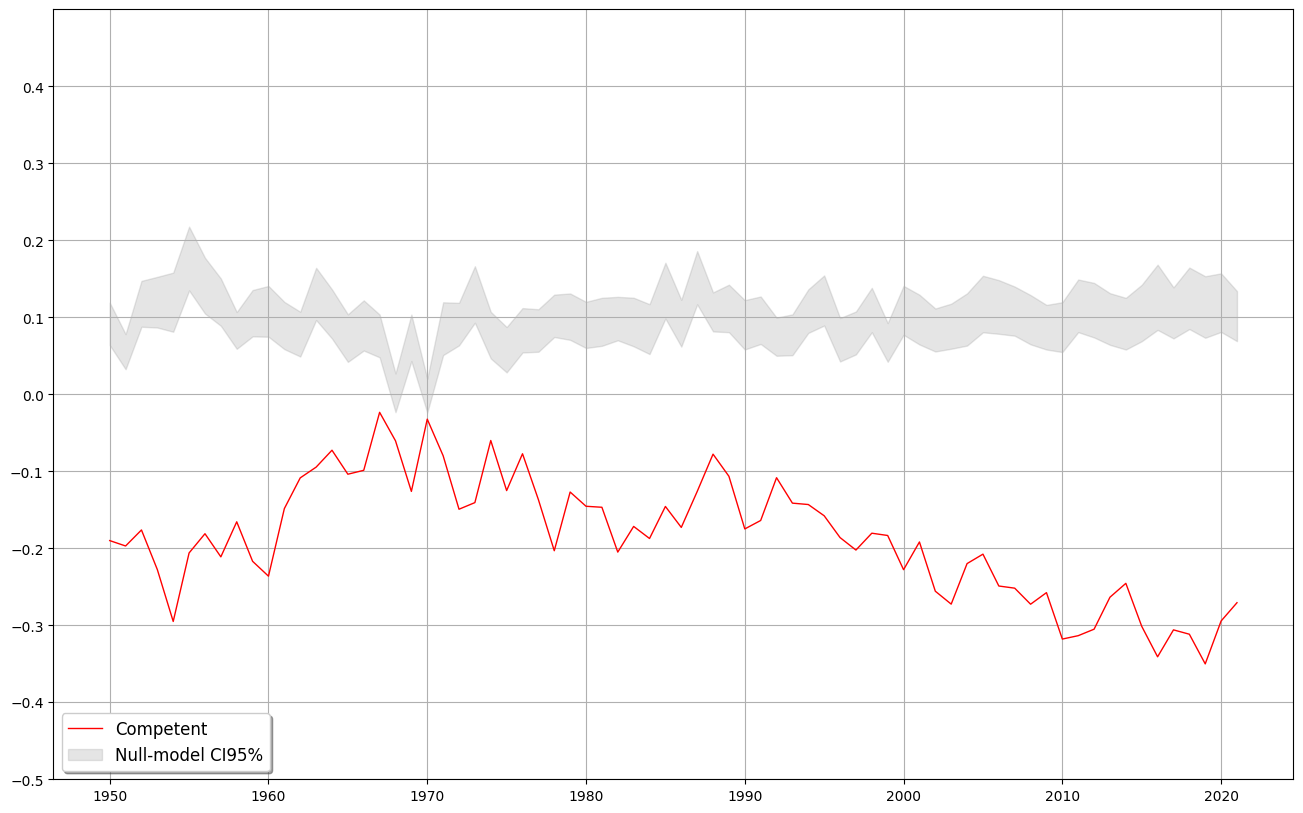

In [36]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_comp.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_competent'] - data1['young_competent'], color='red', lw=1, linestyle = 'solid', label='Competent')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'competent.png')

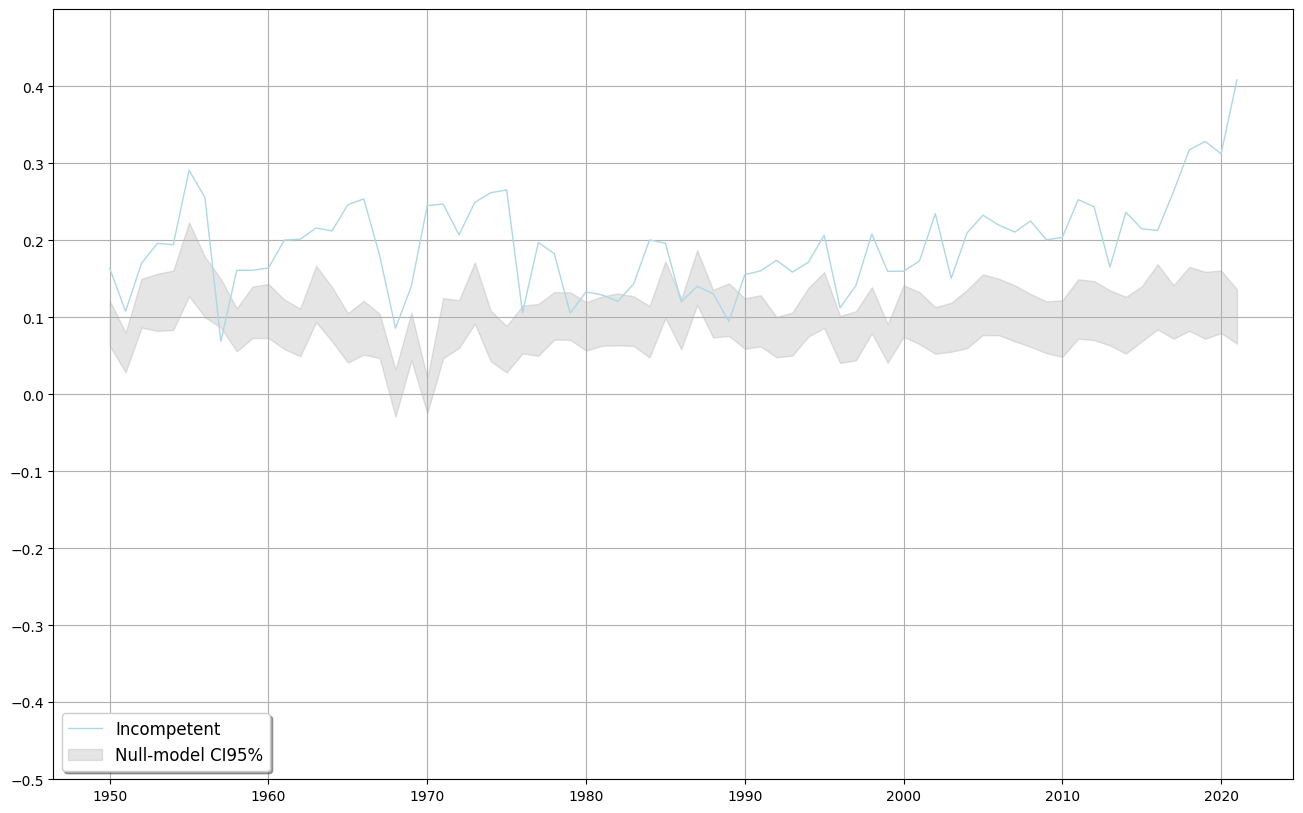

In [38]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_incomp.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_incompetent'] - data1['young_incompetent'], color='lightblue', lw=1, linestyle = 'solid', label='Incompetent')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'incompetent.png')

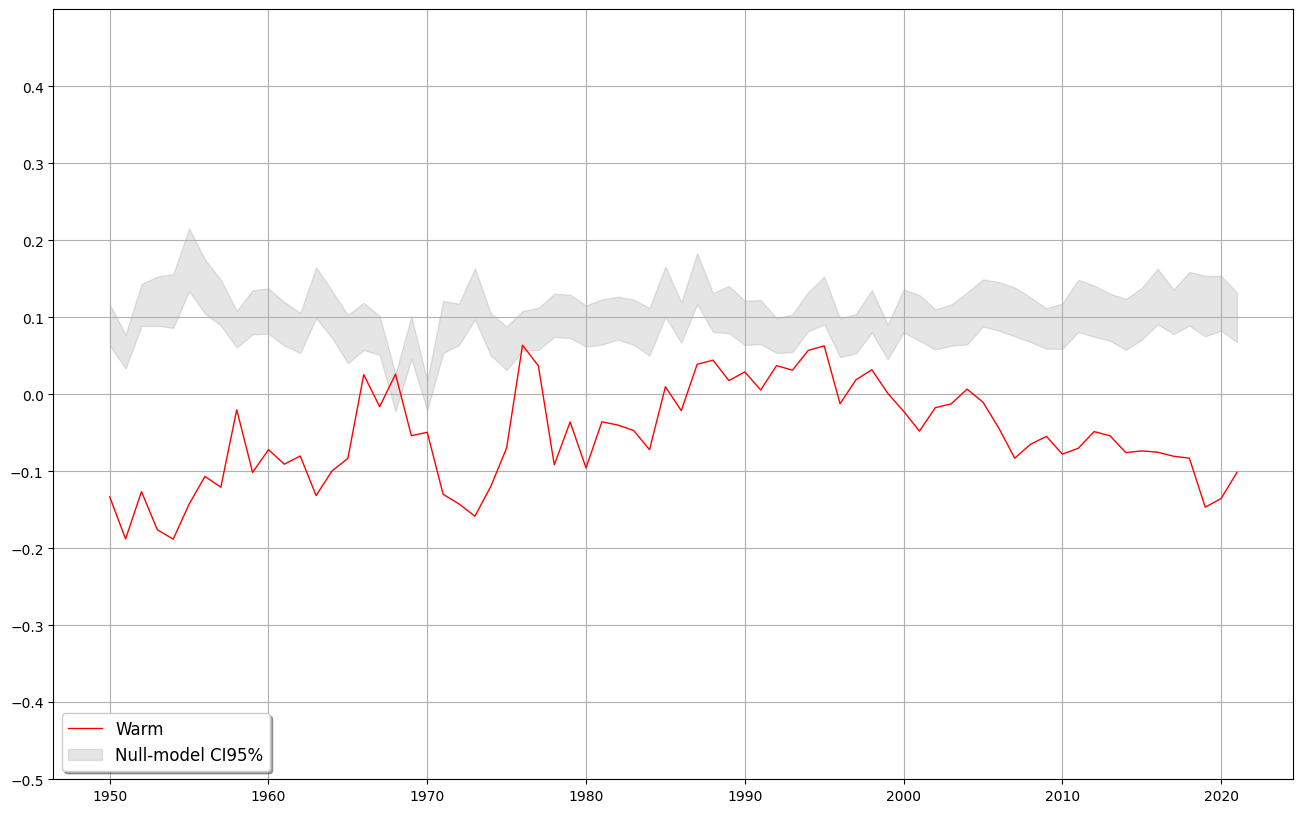

In [39]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_warm.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_warm'] - data1['young_warm'], color='red', lw=1, linestyle = 'solid', label='Warm')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'warm.png')

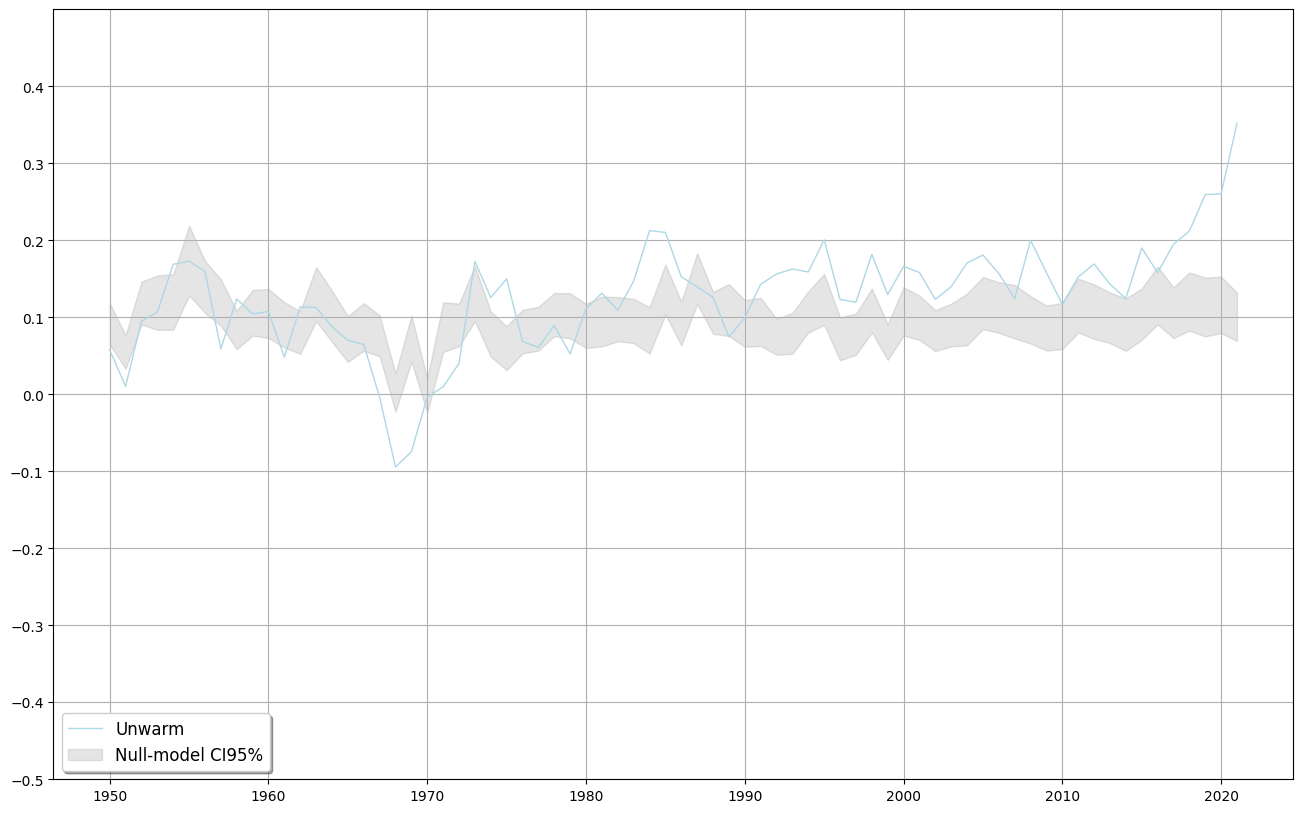

In [41]:
data1 = results
data2 = boot_df[boot_df['filename'] == 'null_unwarm.csv']
yticks=np.arange(-0.5,0.5,0.1)

fig, ax = plt.subplots(figsize=(16,10), dpi= 100)
ax.plot(data1['year'], data1['old_unwarm'] - data1['young_unwarm'], color='lightblue', lw=1, linestyle = 'solid', label='Unwarm')
# plot the 95% confidence interval as a grey band
ax.fill_between(data2['year'], data2['95percent_lower'], data2['95percent_upper'],
                 color='grey', alpha=0.2, label ='Null-model CI95%')
# set the plot limits and add legend
ax.set_ylim([-0.50, 0.50])
legend = ax.legend(loc='lower left', shadow=True, fontsize='large')
ax.set_yticks(yticks)
ax.grid(True)

fig.savefig(outpath+'unwarm.png')

# cultural values for supp

In [1]:
import pandas as pd
import os
outpath = '/home/local/PSYCH-ADS/xuqian_chen/Github/agebias-chi/2_pipeline/out/'
dfage = pd.read_csv(outpath+'merged.csv')
dfrmrb = pd.read_csv(outpath+'merged_rmrb.csv')

In [8]:
# test if coll is negatively correlated with year
from scipy.stats import spearmanr
# delete nan
dfage = dfage.dropna()
spearmanr(dfage['year'], dfage['coll'])
# whether the correlation is significant
if spearmanr(dfage['year'], dfage['coll'])[1] < 0.05:
    print('significant')
else:
    print('not significant')

significant


In [7]:
# print the results for cultural looseness and tightness
print('looseness')
print(spearmanr(dfage['year'], dfage['loose']))
print('tightness')
print(spearmanr(dfage['year'], dfage['tight']))

looseness
SpearmanrResult(correlation=0.6996346364632811, pvalue=2.2607499338101743e-11)
tightness
SpearmanrResult(correlation=0.08030690537084399, pvalue=0.5118542587575805)


In [12]:
# test the age bias and year
print('positive')
print(spearmanr(dfage['year'], dfage['old_positive'] - dfage['young_positive']))
print('negative')
print(spearmanr(dfage['year'], dfage['old_negative'] - dfage['young_negative']))
print('virtue')
print(spearmanr(dfage['year'], dfage['old_virtue'] - dfage['young_virtue']))
print('vice')
print(spearmanr(dfage['year'], dfage['old_vice'] - dfage['young_vice']))
print('competent')
print(spearmanr(dfage['year'], dfage['old_competent'] - dfage['young_competent']))
print('incompetent')
print(spearmanr(dfage['year'], dfage['old_incompetent'] - dfage['young_incompetent']))
print('warm')
print(spearmanr(dfage['year'], dfage['old_warm'] - dfage['young_warm']))
print('unwarm')
print(spearmanr(dfage['year'], dfage['old_unwarm'] - dfage['young_unwarm']))


positive
SpearmanrResult(correlation=0.020643039824625505, pvalue=0.8663006761527658)
negative
SpearmanrResult(correlation=0.16748264523200587, pvalue=0.16896491643914702)
virtue
SpearmanrResult(correlation=0.47851662404092077, pvalue=3.198814761388622e-05)
vice
SpearmanrResult(correlation=0.5154914139568871, pvalue=5.824280583301962e-06)
competent
SpearmanrResult(correlation=-0.5149433686518086, pvalue=5.982004745549606e-06)
incompetent
SpearmanrResult(correlation=0.1752648885641213, pvalue=0.14974334436542636)
warm
SpearmanrResult(correlation=0.4012056996711728, pvalue=0.0006342618607160499)
unwarm
SpearmanrResult(correlation=0.5683595177201316, pvalue=3.502217140222073e-07)


In [13]:
# test using pearson correlation
from scipy.stats import pearsonr
print('positive')
print(pearsonr(dfage['year'], dfage['old_positive'] - dfage['young_positive']))
print('negative')
print(pearsonr(dfage['year'], dfage['old_negative'] - dfage['young_negative']))
print('virtue')
print(pearsonr(dfage['year'], dfage['old_virtue'] - dfage['young_virtue']))
print('vice')
print(pearsonr(dfage['year'], dfage['old_vice'] - dfage['young_vice']))
print('competent')
print(pearsonr(dfage['year'], dfage['old_competent'] - dfage['young_competent']))
print('incompetent')
print(pearsonr(dfage['year'], dfage['old_incompetent'] - dfage['young_incompetent']))
print('warm')
print(pearsonr(dfage['year'], dfage['old_warm'] - dfage['young_warm']))
print('unwarm')
print(pearsonr(dfage['year'], dfage['old_unwarm'] - dfage['young_unwarm']))

positive
PearsonRResult(statistic=0.0063338856800914875, pvalue=0.9588055676909202)
negative
PearsonRResult(statistic=0.1682255346814625, pvalue=0.16705552924001255)
virtue
PearsonRResult(statistic=0.5100422995930247, pvalue=7.5811380114442705e-06)
vice
PearsonRResult(statistic=0.48730663240454336, pvalue=2.1717525277840778e-05)
competent
PearsonRResult(statistic=-0.5454105666860731, pvalue=1.2588678575574983e-06)
incompetent
PearsonRResult(statistic=0.1829423732359791, pvalue=0.13242668949576913)
warm
PearsonRResult(statistic=0.41325135876820857, pvalue=0.000416877313540517)
unwarm
PearsonRResult(statistic=0.530611842999209, pvalue=2.7351747571253603e-06)


In [14]:
# test cultural and year
print('indi')
print(pearsonr(dfage['year'], dfage['indi']))
print('coll')
print(pearsonr(dfage['year'], dfage['coll']))
print('looseness')
print(pearsonr(dfage['year'], dfage['loose']))
print('tightness')
print(pearsonr(dfage['year'], dfage['tight']))


indi
PearsonRResult(statistic=0.8905103392638205, pvalue=1.3195100623865578e-24)
coll
PearsonRResult(statistic=-0.5875293182118388, pvalue=1.1139531112319879e-07)
looseness
PearsonRResult(statistic=0.6948843862533802, pvalue=3.504419851382611e-11)
tightness
PearsonRResult(statistic=-0.046245895497730595, pvalue=0.7059273986306676)


In [15]:
# use spearman
print('indi')
print(spearmanr(dfage['year'], dfage['indi']))
print('coll')
print(spearmanr(dfage['year'], dfage['coll']))
print('looseness')
print(spearmanr(dfage['year'], dfage['loose']))
print('tightness')
print(spearmanr(dfage['year'], dfage['tight']))

indi
SpearmanrResult(correlation=0.8933503836317136, pvalue=5.735304137213187e-25)
coll
SpearmanrResult(correlation=-0.5658019729630983, pvalue=4.05837938710639e-07)
looseness
SpearmanrResult(correlation=0.6996346364632811, pvalue=2.2607499338101743e-11)
tightness
SpearmanrResult(correlation=0.08030690537084399, pvalue=0.5118542587575805)


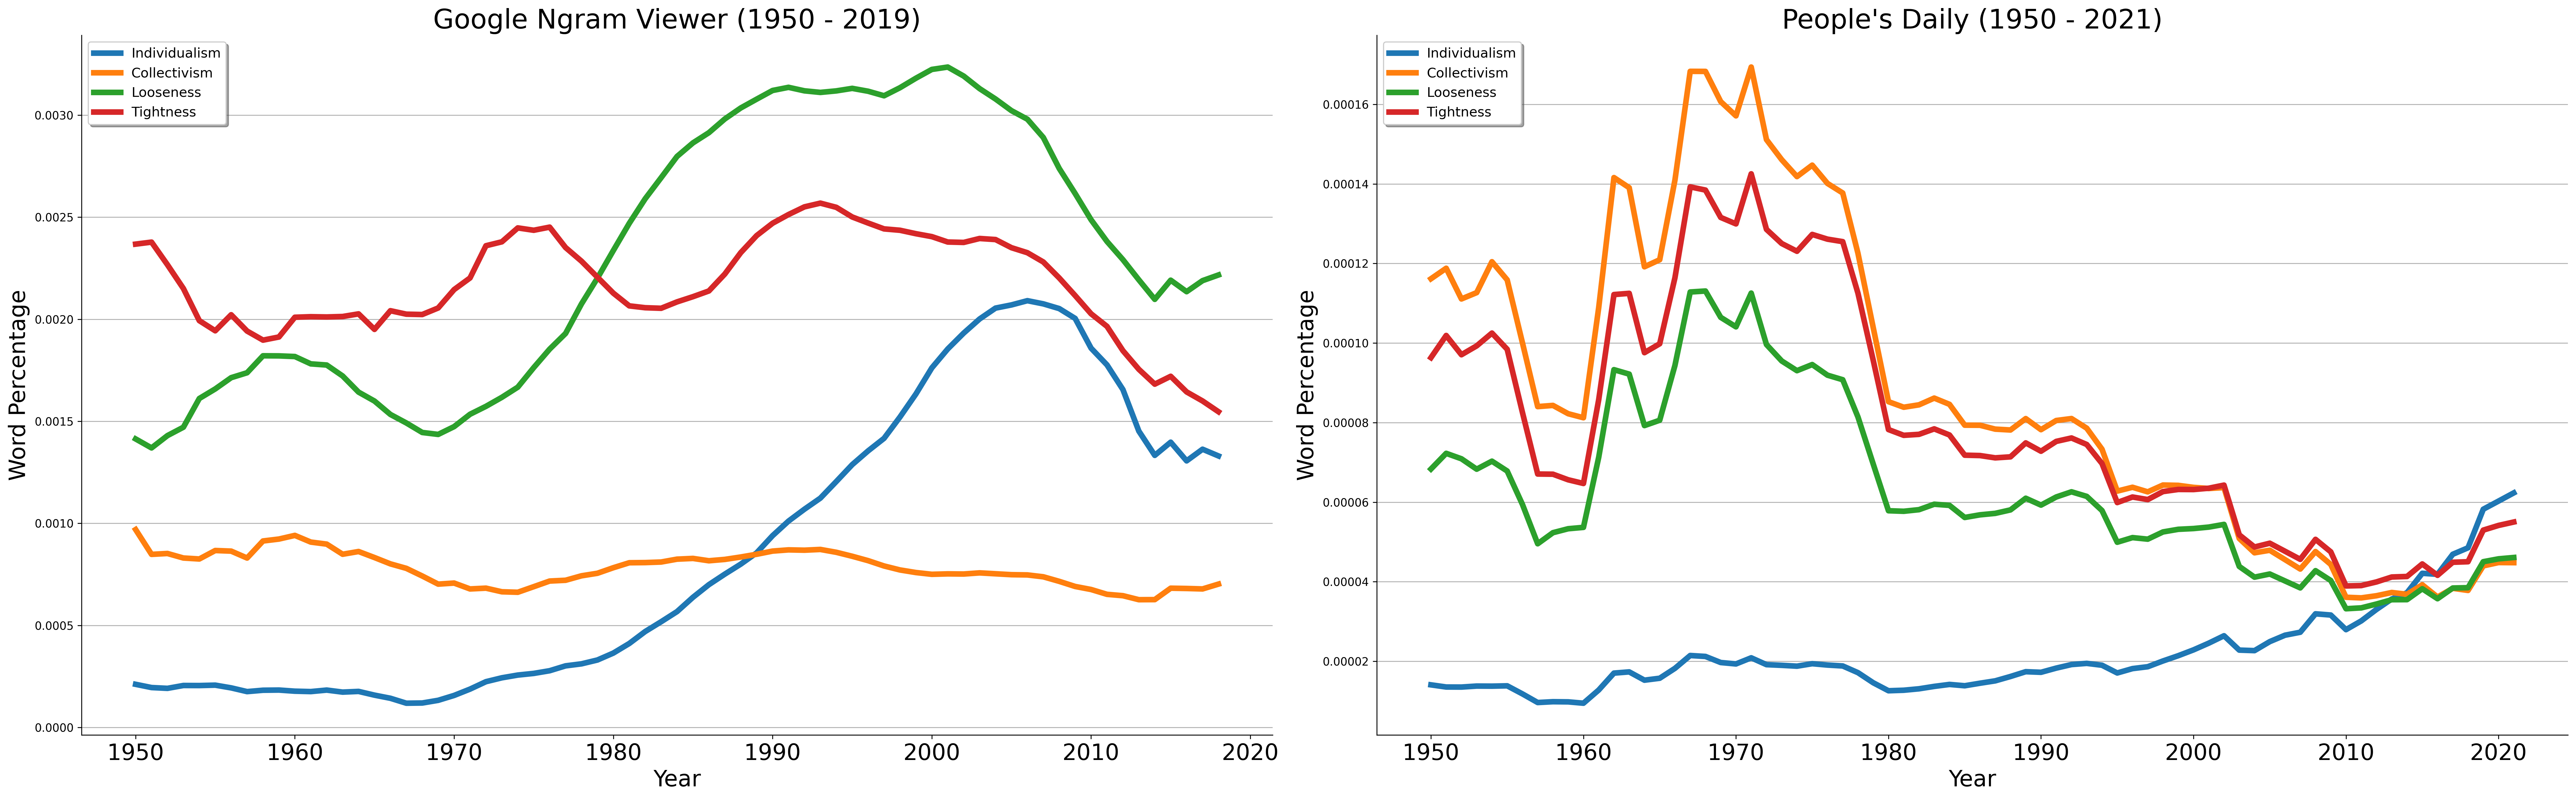

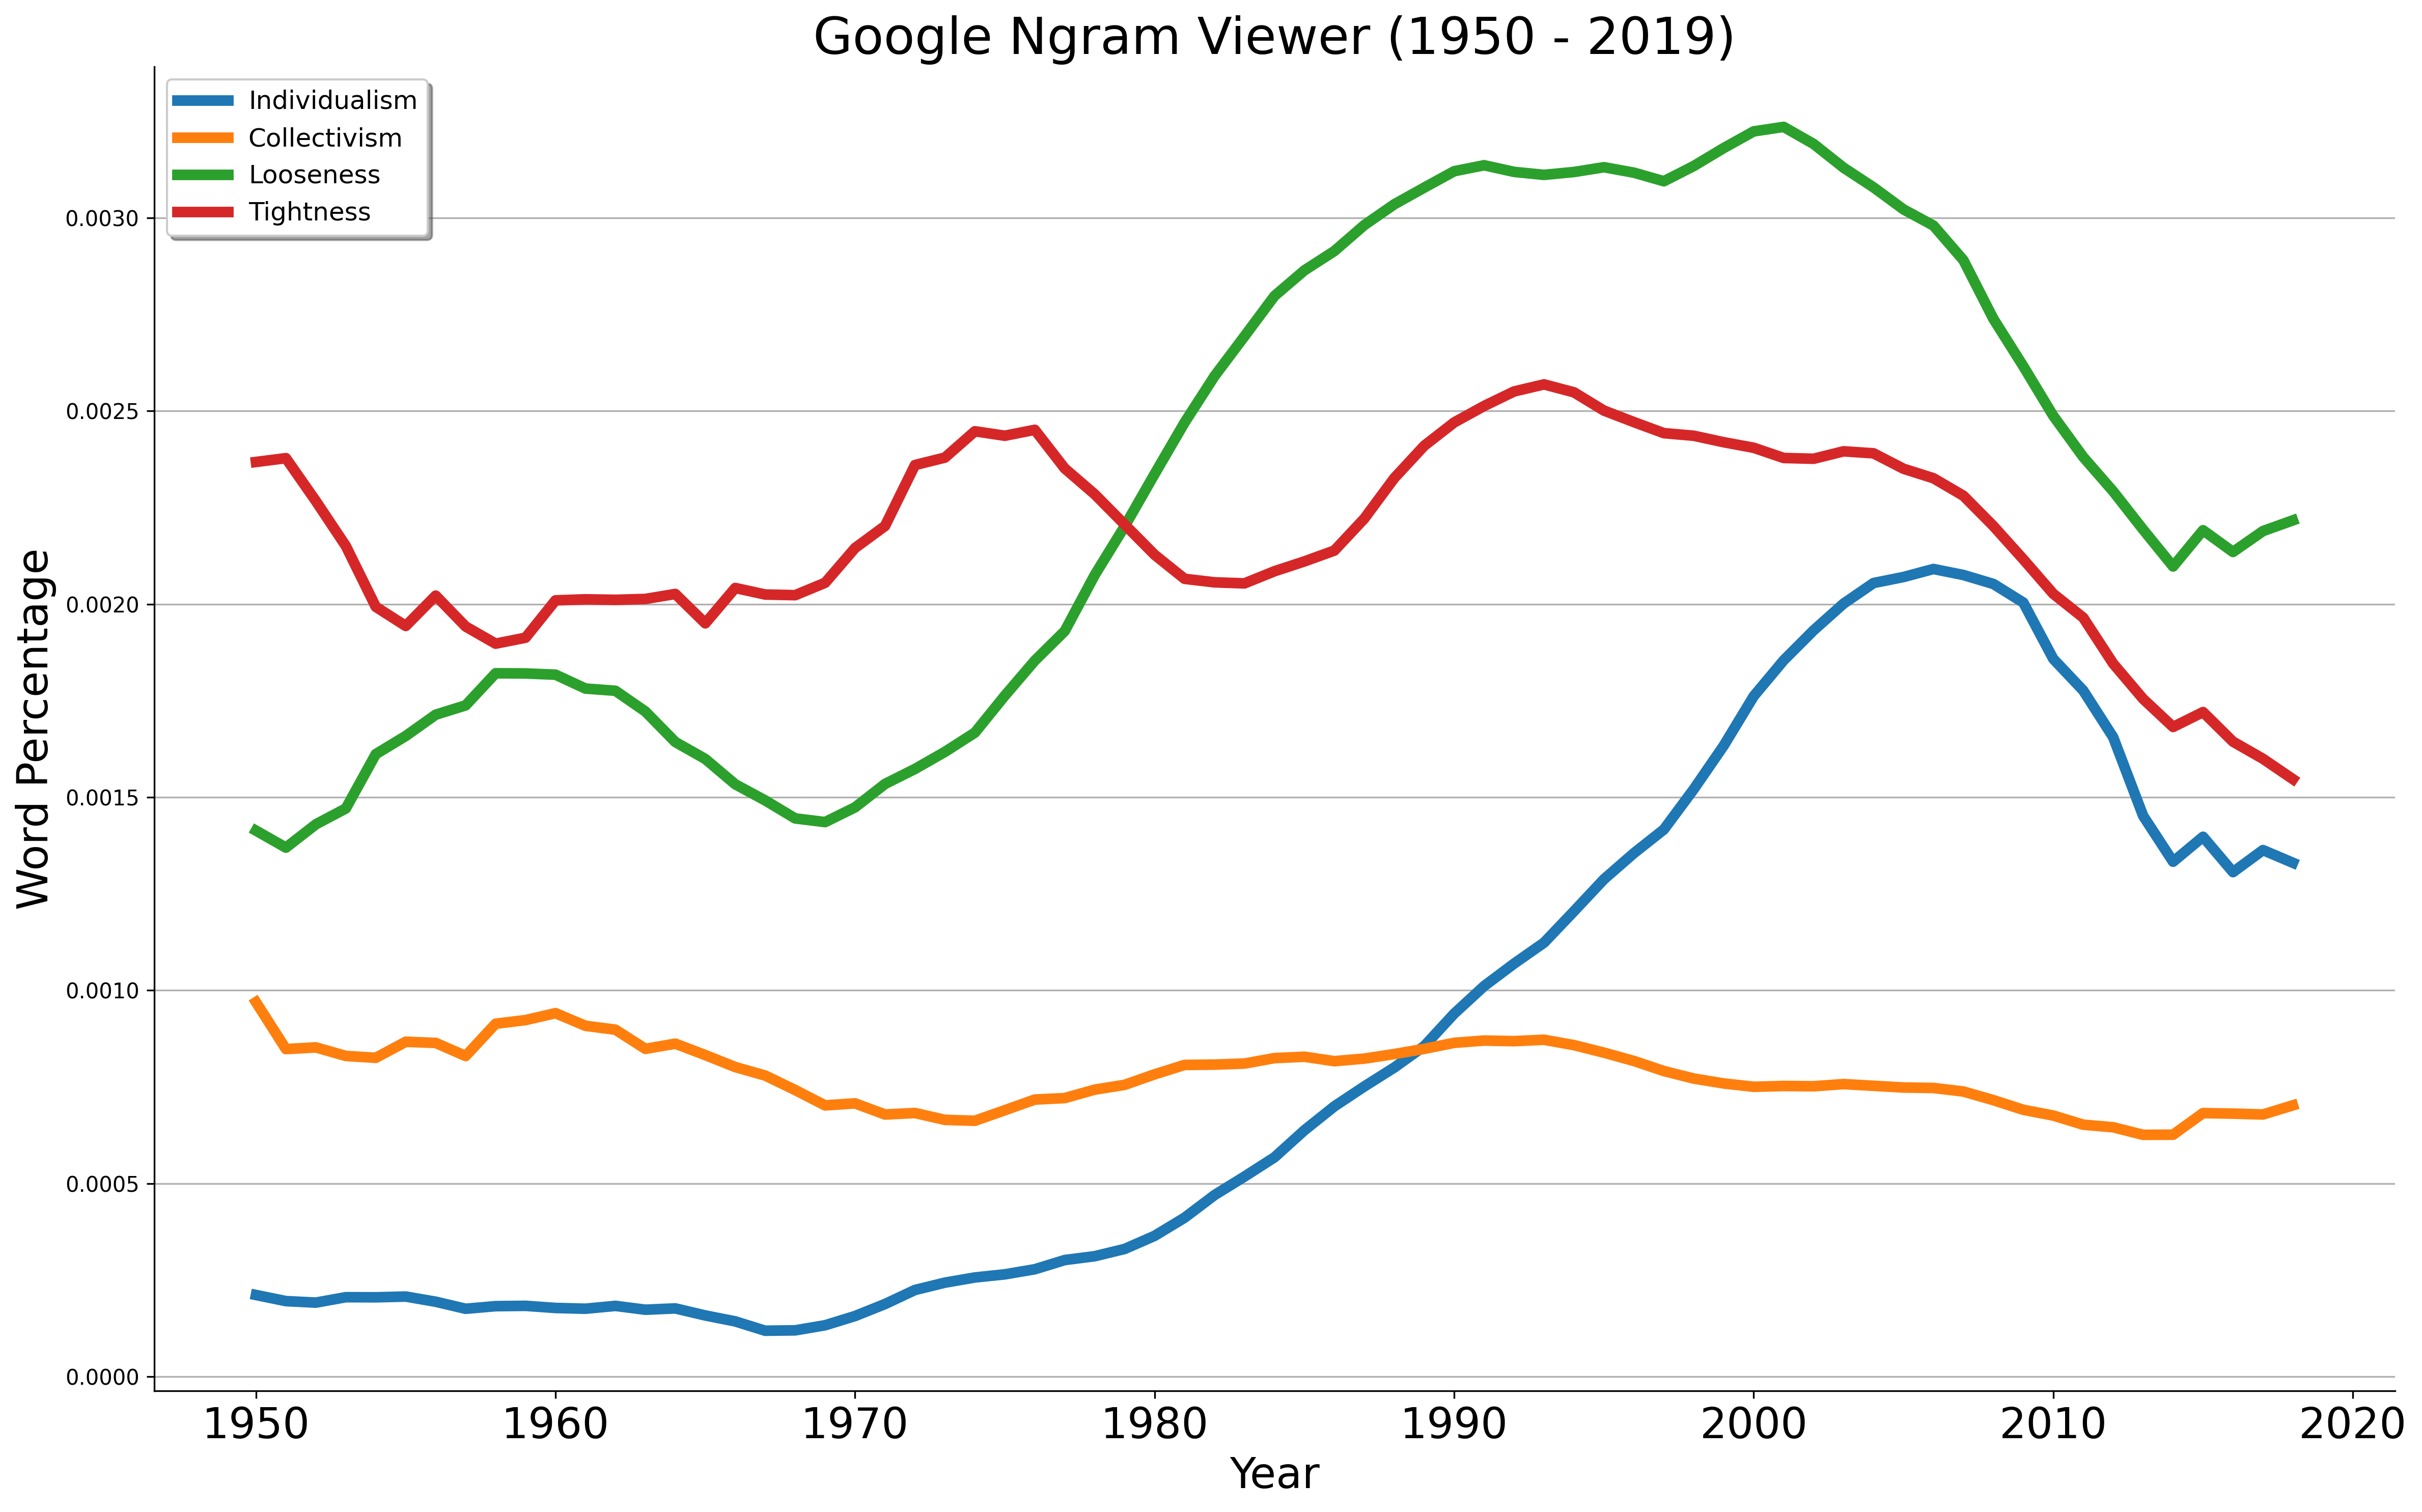

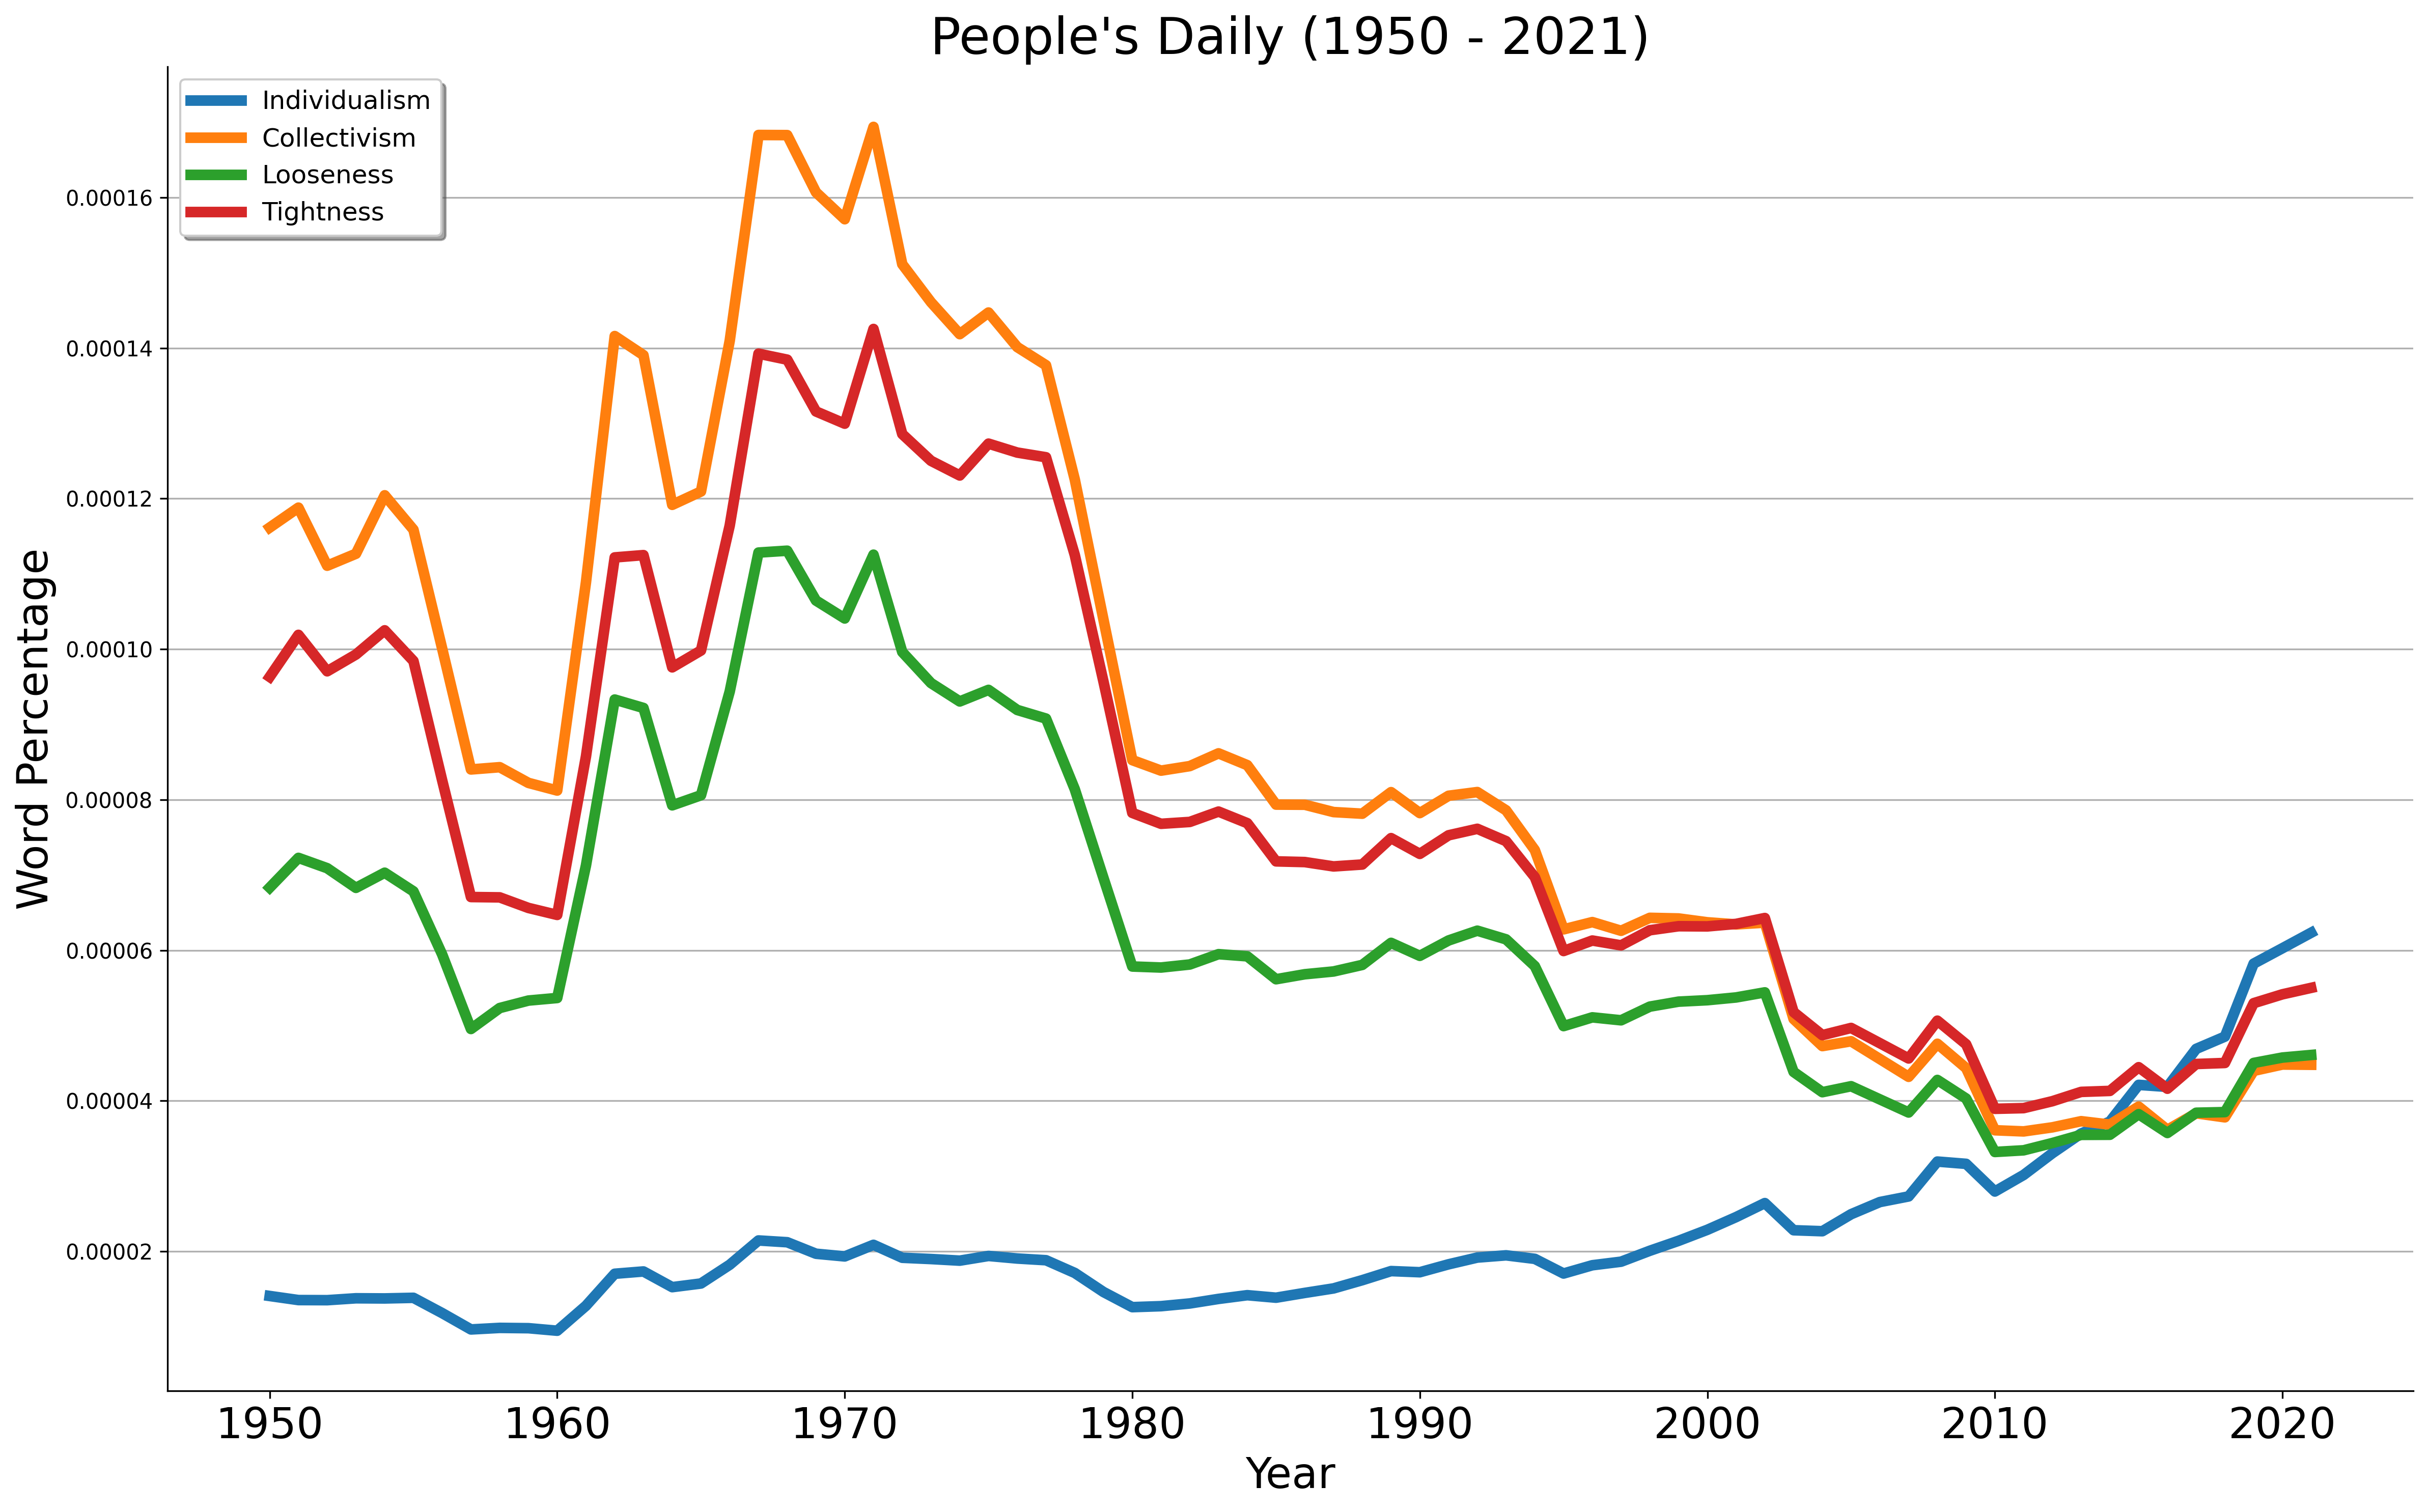

In [3]:
# visualize indi, coll and tight, loose side by sidein psychology paper
import matplotlib.pyplot as plt
import numpy as np

# plot the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(32, 10), dpi=300)
# plot the first subplot
axes[0].plot(dfage['year'], dfage['indi'],  lw=5, linestyle = 'solid', label='Individualism')
axes[0].plot(dfage['year'], dfage['coll'],  lw=5, linestyle = 'solid', label='Collectivism')
axes[0].plot(dfage['year'], dfage['loose'],  lw=5, linestyle = 'solid', label='Looseness')
axes[0].plot(dfage['year'], dfage['tight'],  lw=5, linestyle = 'solid', label='Tightness')

# plot the second subplot
axes[1].plot(dfrmrb['year'], dfrmrb['indi'],  lw=5, linestyle = 'solid', label='Individualism')
axes[1].plot(dfrmrb['year'], dfrmrb['coll'],  lw=5, linestyle = 'solid', label='Collectivism')
axes[1].plot(dfrmrb['year'], dfrmrb['loose'],  lw=5, linestyle = 'solid', label='Looseness')
axes[1].plot(dfrmrb['year'], dfrmrb['tight'],  lw=5, linestyle = 'solid', label='Tightness')
# add title
axes[0].set_title('Google Ngram Viewer (1950 - 2019)', fontsize=24)
axes[1].set_title("People's Daily (1950 - 2021)", fontsize=24)
# add legend an labels
axes[0].legend(loc='upper left', shadow=True, fontsize='large')
axes[1].legend(loc='upper left', shadow=True, fontsize='large')
axes[0].set_xlabel('Year', fontsize=20)
axes[1].set_xlabel('Year', fontsize=20)
axes[0].set_ylabel('Word Percentage', fontsize=20)
axes[1].set_ylabel('Word Percentage', fontsize=20)

# only use horizontal grid lines
axes[0].grid(axis='y')
axes[1].grid(axis='y')

# only keep the bottom and left spines
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# larger font size of x ticks
axes[0].tick_params(axis='x', labelsize=20)
axes[1].tick_params(axis='x', labelsize=20)

# tight layout
fig.tight_layout()

figurepath = '/home/local/PSYCH-ADS/xuqian_chen/Github/agebias-chi/3_output/figures/'
# save the figure
fig.savefig(figurepath+'indi_coll_tight_loose_both.png')


# another figure only dfage
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), dpi=300)
# plot the first subplot
axes.plot(dfage['year'], dfage['indi'],  lw=5, linestyle = 'solid', label='Individualism')
axes.plot(dfage['year'], dfage['coll'],  lw=5, linestyle = 'solid', label='Collectivism')
axes.plot(dfage['year'], dfage['loose'],  lw=5, linestyle = 'solid', label='Looseness')
axes.plot(dfage['year'], dfage['tight'],  lw=5, linestyle = 'solid', label='Tightness')

# add title
axes.set_title('Google Ngram Viewer (1950 - 2019)', fontsize=24)
# add legend an labels
axes.legend(loc='upper left', shadow=True, fontsize='large')
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Word Percentage', fontsize=20)

# only use horizontal grid lines
axes.grid(axis='y')

# only keep the bottom and left spines
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# larger font size of x ticks
axes.tick_params(axis='x', labelsize=20)

# tight layout
fig.tight_layout()

figurepath = '/home/local/PSYCH-ADS/xuqian_chen/Github/agebias-chi/3_output/figures/'
# save the figure
fig.savefig(figurepath+'Figure1_indi_coll_tight_loose.png')

# plot only dfrmrb
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), dpi=300)
# plot the first subplot
axes.plot(dfrmrb['year'], dfrmrb['indi'],  lw=5, linestyle = 'solid', label='Individualism')
axes.plot(dfrmrb['year'], dfrmrb['coll'],  lw=5, linestyle = 'solid', label='Collectivism')
axes.plot(dfrmrb['year'], dfrmrb['loose'],  lw=5, linestyle = 'solid', label='Looseness')
axes.plot(dfrmrb['year'], dfrmrb['tight'],  lw=5, linestyle = 'solid', label='Tightness')

# add title
axes.set_title("People's Daily (1950 - 2021)", fontsize=24)
# add legend an labels
axes.legend(loc='upper left', shadow=True, fontsize='large')
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Word Percentage', fontsize=20)

# only use horizontal grid lines
axes.grid(axis='y')

# only keep the bottom and left spines
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

# larger font size of x ticks
axes.tick_params(axis='x', labelsize=20)

# tight layout
fig.tight_layout()

figurepath = '/home/local/PSYCH-ADS/xuqian_chen/Github/agebias-chi/3_output/figures/'

# save the figure
fig.savefig(figurepath+'Figrue1S_indi_coll_tight_loose_rmrb.png')
